In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)

In [2]:
df = pd.read_csv('../TAMU_FINAL_DATASET_2018/TAMU_FINAL_DATASET_2018.csv')

In [7]:
ami_1 = df[df['AMI_FLAG'] == 1]

In [8]:
len(ami_1)

2726

In [5]:
demographic_data = ['AGE', 'SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL','LIS', 'Est_Net_worth', 'Est_income', \
                   'Population_density_centile_ST','Population_density_centile_US', 'Education_level', 'Length_residence',\
                   'Num_person_household', 'College','Online_purchaser', 'Online_User', 'Pct_above_poverty_line',\
       'Pct_below_poverty_line', 'Dwelling_Type' ]

In [6]:
demograph_df = df[demographic_data]

In [7]:
demograph_df.head()

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type
0,77,F,N,N,N,N,87500.0,87500.0,70.0,84.0,4.0,13.0,3.0,1.0,0.0,1.0,94.0,6.0,S
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T
2,75,F,N,N,N,N,625000.0,112000.0,30.0,30.0,6.0,8.0,1.0,1.0,0.0,1.0,95.0,5.0,A
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S
4,81,F,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
demograph_df.isnull().sum()

AGE                                  0
SEX_CD                              30
ESRD_IND                            32
HOSPICE_IND                         32
INSTITUTIONAL                       30
LIS                                 30
Est_Net_worth                    12179
Est_income                       12179
Population_density_centile_ST    12179
Population_density_centile_US    12179
Education_level                  12179
Length_residence                 12179
Num_person_household             12179
College                          12179
Online_purchaser                 12179
Online_User                      12179
Pct_above_poverty_line           12179
Pct_below_poverty_line           12179
Dwelling_Type                    12179
dtype: int64

In [9]:
demograph_df.shape

(100000, 19)

In [14]:
## Removng the entries withNULL data for income and worth

In [13]:
demograph_df =demograph_df[~pd.isnull(demograph_df['Est_Net_worth'])]

In [16]:
demograph_df[['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL', 'LIS']].describe()

,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS
count,87795,87794,87794,87795,87795
unique,2,2,2,2,2
top,F,N,N,N,N
freq,50029,87322,87428,87423,71407


In [17]:
demograph_df['SEX_CD'] = demograph_df['SEX_CD'].fillna('F')
demograph_df['ESRD_IND'] = demograph_df['ESRD_IND'].fillna('N')
demograph_df['HOSPICE_IND'] = demograph_df['HOSPICE_IND'].fillna('N')
demograph_df['INSTITUTIONAL'] = demograph_df['INSTITUTIONAL'].fillna('N')
demograph_df['LIS'] = demograph_df['LIS'].fillna('N')

In [18]:
demograph_df.isnull().sum()

AGE                              0
SEX_CD                           0
ESRD_IND                         0
HOSPICE_IND                      0
INSTITUTIONAL                    0
LIS                              0
Est_Net_worth                    0
Est_income                       0
Population_density_centile_ST    0
Population_density_centile_US    0
Education_level                  0
Length_residence                 0
Num_person_household             0
College                          0
Online_purchaser                 0
Online_User                      0
Pct_above_poverty_line           0
Pct_below_poverty_line           0
Dwelling_Type                    0
dtype: int64

In [27]:
cat_cols = ['College', 'Online_purchaser', 'Online_User','Dwelling_Type', 'Education_level',  'SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL', 'LIS']

In [28]:
for c in cat_cols:
    demograph_df[c] = demograph_df[c].astype('category')

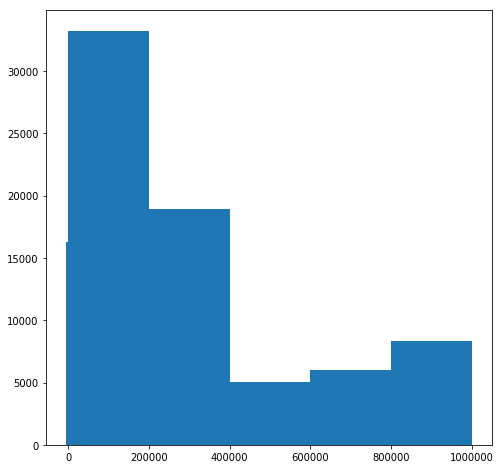

In [22]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (8,8))
plt.hist(demograph_df['Est_Net_worth'], bins = [-5000, 0, 200000, 400000, 600000, 800000, 1000000])
plt.show()

In [29]:
demograph_df.describe()

,AGE,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Length_residence,Num_person_household,Pct_above_poverty_line,Pct_below_poverty_line
count,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000
mean,73.026429,231753.794650,57525.176211,53.313319,59.048143,16.717471,2.424363,87.814270,12.092666
std,9.455213,292006.317591,47507.449024,27.856532,25.702810,19.276856,1.723129,9.942013,9.631543
min,40.000000,-2500.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,68.000000,2500.000000,25000.000000,30.000000,38.000000,5.000000,1.000000,83.000000,5.000000
50%,73.000000,125000.000000,45000.000000,54.000000,61.000000,13.000000,2.000000,90.000000,10.000000
75%,79.000000,312500.000000,87500.000000,78.000000,82.000000,19.000000,3.000000,95.000000,17.000000
max,95.000000,1000000.000000,500000.000000,99.000000,99.000000,99.000000,17.000000,99.000000,89.000000


In [30]:
dummy_df = pd.get_dummies(demograph_df, columns=cat_cols)

In [36]:
dummy_df.shape

(87821, 42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(dummy_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_X = sc.transform(dummy_df)

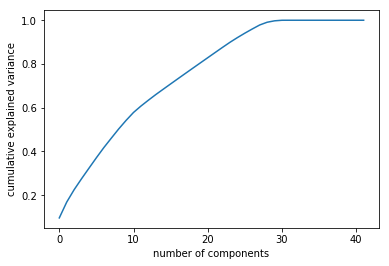

In [40]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [41]:
## Something around 25 would explain 90%of variation, so n_comp for pca = 25

In [42]:
pca_25 = PCA(n_components=25).fit(scaled_X)


In [45]:
pcs = pca_25.transform(scaled_X)

In [47]:
pcs

array([[-2.51555185,  1.06346602,  1.09449429, ..., -0.07996877,
         0.08240949,  0.56397794],
       [ 0.71037146,  3.23145775, -0.04359604, ..., -0.60871356,
        -4.87453096, -0.55278388],
       [-2.48978559, -0.84602645,  4.37312615, ..., -0.02328143,
        -0.29172534,  1.3018374 ],
       ...,
       [-0.75295887, -2.65566651,  0.14220798, ...,  0.10344508,
         0.83011299, -1.2583906 ],
       [-0.18162627, -2.37311276,  0.93768459, ..., -0.26865434,
        -0.8517498 , -1.22412435],
       [ 2.30430405,  3.96381592,  1.35182306, ...,  0.12065551,
         0.12153221,  0.15754549]])

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [54]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pcs)
    #kmeanModel.fit(pcs)
    distortions.append(sum(np.min(cdist(pcs, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pcs.shape[0])

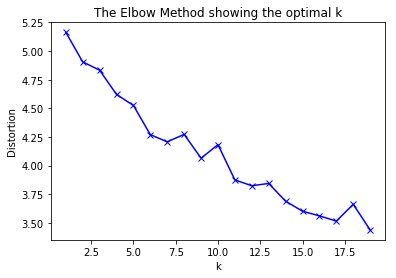

In [55]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
## Based on the graph above, 7 is fine I believe

In [56]:
kmeans_7 = KMeans(n_clusters=7).fit(scaled_X)


In [59]:
demograph_df['clusterNo'] = kmeans_7.labels_

In [60]:
demograph_df

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
0,77,F,N,N,N,N,87500.0,87500.0,70.0,84.0,4.0,13.0,3.0,1.0,0.0,1.0,94.0,6.0,S,5
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T,0
2,75,F,N,N,N,N,625000.0,112000.0,30.0,30.0,6.0,8.0,1.0,1.0,0.0,1.0,95.0,5.0,A,5
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
5,72,F,N,N,N,N,87500.0,55000.0,28.0,38.0,4.0,15.0,3.0,0.0,0.0,1.0,87.0,13.0,S,1
6,73,F,N,N,N,N,15000.0,87500.0,14.0,33.0,4.0,11.0,2.0,0.0,0.0,0.0,99.0,1.0,S,1
7,69,M,N,N,N,N,200000.0,35000.0,87.0,76.0,4.0,21.0,2.0,0.0,0.0,0.0,95.0,5.0,P,2
8,71,M,N,N,N,N,125000.0,55000.0,79.0,86.0,4.0,10.0,2.0,0.0,0.0,1.0,79.0,21.0,S,1
9,78,M,N,N,N,N,15000.0,67500.0,78.0,85.0,4.0,56.0,1.0,0.0,0.0,0.0,92.0,8.0,S,1
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6


In [62]:
demograph_df['clusterNo'].value_counts()

1    26818
6    26695
0    12413
3    10371
5     6653
2     4399
4      472
Name: clusterNo, dtype: int64

In [67]:
clust_4 = demograph_df.loc[demograph_df['clusterNo'] == 4]

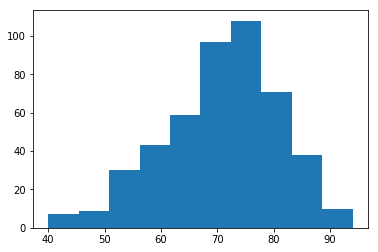

In [68]:
plt.hist(clust_4['AGE'])
plt.show()

In [69]:
clust6 = demograph_df.loc[demograph_df['clusterNo'] == 6]

In [71]:
clust6

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6
17,91,M,N,N,N,N,-2500.0,35000.0,1.0,2.0,4.0,99.0,1.0,0.0,0.0,0.0,48.0,52.0,A,6
19,90,M,N,N,N,N,200000.0,55000.0,52.0,75.0,3.0,19.0,2.0,0.0,0.0,0.0,96.0,4.0,S,6
20,74,M,N,N,Y,Y,-2500.0,7500.0,82.0,95.0,3.0,99.0,1.0,0.0,0.0,0.0,88.0,12.0,S,6
22,71,M,N,N,N,N,312500.0,67500.0,86.0,89.0,3.0,19.0,2.0,0.0,0.0,1.0,83.0,17.0,S,6
23,54,M,N,N,N,Y,37500.0,87500.0,80.0,89.0,3.0,9.0,4.0,0.0,0.0,1.0,92.0,8.0,S,6
27,68,F,N,N,N,N,-2500.0,55000.0,99.0,97.0,3.0,1.0,2.0,0.0,0.0,0.0,85.0,15.0,S,6
29,86,F,N,N,N,N,200000.0,45000.0,35.0,49.0,3.0,19.0,3.0,0.0,0.0,0.0,96.0,4.0,S,6
35,63,M,N,N,N,Y,-2500.0,17500.0,67.0,61.0,3.0,5.0,1.0,0.0,0.0,0.0,77.0,23.0,S,6


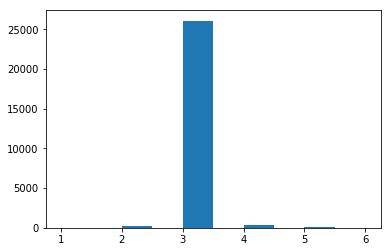

In [72]:
plt.hist(clust6['Education_level'])
plt.show()

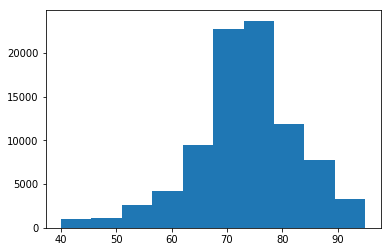

In [73]:
plt.hist(demograph_df['AGE'])
plt.show()

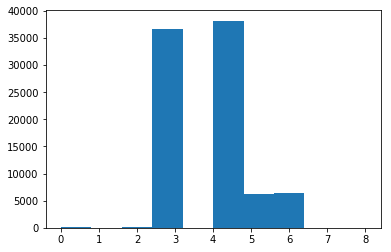

In [74]:
plt.hist(demograph_df['Education_level'])
plt.show()

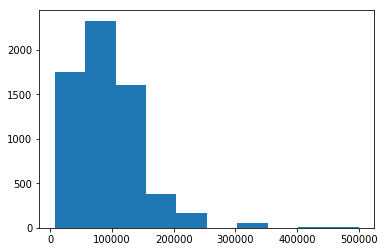

In [75]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 5),'Est_income'])
plt.show()

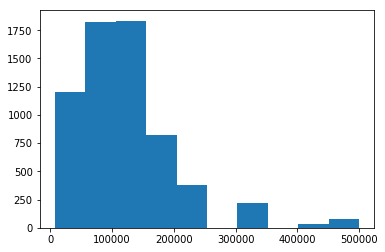

In [76]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 6),'Est_income'])
plt.show()

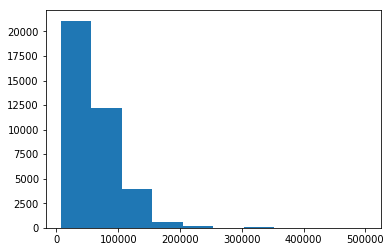

In [78]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 4),'Est_income'])
plt.show()

In [80]:
demograph_df[demograph_df['Est_Net_worth'] <0].head()

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T,0
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6
12,67,F,N,N,N,N,-2500.0,7500.0,13.0,32.0,4.0,1.0,1.0,0.0,1.0,1.0,78.0,22.0,S,0
13,63,F,N,N,N,Y,-2500.0,7500.0,89.0,92.0,3.0,4.0,1.0,1.0,1.0,1.0,78.0,22.0,S,5
